In [844]:

import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_0c4374cc9ea94d83be07b65352226c15 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='bBYo31aL9fw-B1rC4eZnEh1xug57cUN02o2CPy9fP5z6',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_0c4374cc9ea94d83be07b65352226c15.get_object(Bucket='casa54c5781981c34a3b9e2c7062fa49bc6f',Key='df_pe_filtered_Q4.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data = pd.read_csv(body)
df_data.count()



Unnamed: 0     13505
Study          13505
Country        13505
Year_Period    13505
Month          13505
Measure        13505
Amount         13505
dtype: int64

In [432]:

body = client_0c4374cc9ea94d83be07b65352226c15.get_object(Bucket='casa54c5781981c34a3b9e2c7062fa49bc6f',Key='df_study_country.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_attribute = pd.read_csv(body)
df_data_attribute.head()
#rename country column
df_data_attribute = df_data_attribute.rename(columns={"Country_dim": "Country"})
df_data_attribute.count()


Unnamed: 0           1808
Study                1808
Country              1808
Number of Centers    1699
Patient Target       1698
Number of Visits     1645
FPI/FSI              1808
LPI/LSI              1808
FPI/FSI Date         1808
LPI/LSI Date         1808
dtype: int64

In [689]:
df_data_attribute['M'] = (df_data_attribute['LPI/LSI Date'] - df_data_attribute['FPI/FSI Date'])/30

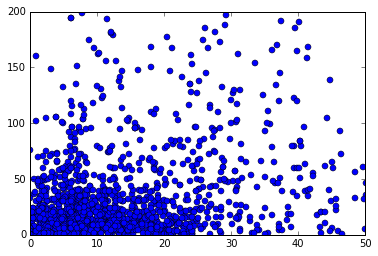

In [698]:
plt.plot(df_data_attribute['M'], df_data_attribute['Patient Target'],'o', 1, 50)
    ## Set axis limits
plt.xlim(0, 50)
plt.ylim(0, 200)
plt.show()
plt.close(1) 

In [433]:
#filter out on going
df_Study_done = df_data_attribute[(df_data_attribute['LPI/LSI Date'] <= 43100)]

df_data_done = df_data
df_data_done = pd.merge(df_Study_done, df_data_done, how = 'inner', on = ['Study', 'Country'])

#print i1
df_Study_done['Combined'] = df_Study_done['Study'] + df_Study_done['Country']
#i2 = df_Study_done.set_index('Combined').index

df_data_done['Combined'] = df_data_done['Study'] + df_data_done['Country']
#i1 = df_data_done.set_index('Combined').index
#print df_Study_done.head()
#df_data_done = df_Study_done.set_index('Combined')
df_data_done['Combined'] = df_data_done['Study'] + df_data_done['Country']
#df_data_done = df_data[~i1.isin(i2)]
#df_data_done.count()
df_data_done.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4246 entries, 0 to 4245
Data columns (total 16 columns):
Unnamed: 0_x         4246 non-null int64
Study                4246 non-null object
Country              4246 non-null object
Number of Centers    4244 non-null float64
Patient Target       4244 non-null float64
Number of Visits     4245 non-null float64
FPI/FSI              4246 non-null object
LPI/LSI              4246 non-null object
FPI/FSI Date         4246 non-null int64
LPI/LSI Date         4246 non-null int64
Unnamed: 0_y         4246 non-null int64
Year_Period          4246 non-null object
Month                4246 non-null object
Measure              4246 non-null object
Amount               4246 non-null float64
Combined             4246 non-null object
dtypes: float64(4), int64(4), object(8)
memory usage: 563.9+ KB


/usr/local/src/bluemix_jupyter_bundle.v81/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [434]:
df_data_done.drop(['Unnamed: 0_x','Unnamed: 0_y'], axis=1, inplace=True)

In [435]:
current_dict = {'Y-13': '2004','Y-12': '2005','Y-11': '2006','Y-10': '2007','Y-09': '2008','Y-08': '2009','Y-07': '2010', 'Y-06': '2011', 'Y-05': '2012','Y-04': '2013', 'Y-03': '2014', 'Y-02': '2015','Y-01': '2016','Y01': '2017','Y02': '2018','Y03': '2019','Y04': '2020','Y05': '2021','Y06': '2022','Y07': '2023','Y08': '2024','Y09': '2025','Y10': '2026','Y11': '2027','Y12': '2028','Y13': '2029','Y14': '2030','Y15': '2031'}

In [436]:
df_data_done['Year_Period'].replace(current_dict, inplace=True)

In [437]:
df_data_done['Month'] = df_data_done['Month'].apply(lambda x:x[1:])

In [438]:
df_data_done['Period'] = (df_data_done['Year_Period'] + "-" + df_data_done['Month'] + "-01").astype('datetime64[ns]')
df_data_done = df_data_done.sort_values(by=['Period'])
print df_data_done.head()

         Study  Country  Number of Centers  Patient Target  Number of Visits  \
3556  LTS12869  USA CSU                  2              12                40   
3557  LTS12869  USA CSU                  2              12                40   
3650  MSC12870  USA CSU                  7              19                23   
3558  LTS12869  USA CSU                  2              12                40   
3651  MSC12870  USA CSU                  7              19                23   

         FPI/FSI     LPI/LSI  FPI/FSI Date  LPI/LSI Date Year_Period Month  \
3556  2008-09-10  2014-02-07         39701         41677        2008    09   
3557  2008-09-10  2014-02-07         39701         41677        2009    09   
3650  2010-05-18  2013-07-15         40316         41470        2010    05   
3558  2008-09-10  2014-02-07         39701         41677        2010    06   
3651  2010-05-18  2013-07-15         40316         41470        2010    06   

                Measure  Amount         Combined  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1315 entries, 0 to 1807
Data columns (total 11 columns):
Unnamed: 0           1315 non-null int64
Study                1315 non-null object
Country              1315 non-null object
Number of Centers    1214 non-null float64
Patient Target       1215 non-null float64
Number of Visits     1201 non-null float64
FPI/FSI              1315 non-null object
LPI/LSI              1315 non-null object
FPI/FSI Date         1315 non-null int64
LPI/LSI Date         1315 non-null int64
Combined             1315 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 123.3+ KB


In [439]:
from scipy.stats import zscore
#df_data_combo = pd.DataFrame({'temp' :  'x'}, index = [1])
import matplotlib.pyplot as plt
def period_inc(Study,Country,df):
    df_data_filtered = df_data_done[(df_data_done['Study'] == Study) & (df_data_done['Country'] == Country)]
    df_data_filtered['period_index'] = range(1,len(df_data_filtered)+1)
    df_data_done['period_index'] = df_data_filtered['period_index']
    df_data_filtered['z_Amount'] = (df_data_filtered['Amount'] - df_data_filtered['Amount'].mean())/df_data_filtered['Amount'].std(ddof=0)
    df_data_filtered['Amount_per'] = df_data_filtered['Amount']/df_data_filtered['Amount'].sum()
    df_data_filtered['period_per'] = 1/df_data_filtered['period_index'].count()
    # df_data_filtered['z_Amount'] = df_data_filtered['Amount'].apply(zscore)
    plt.plot(df_data_filtered['period_index'], df_data_filtered['Amount_per'].cumsum())
    plt.show()
    plt.close(1) 
   # df_data_combo = pd.concat(df_data_combo,df_data_filtered)
   # print df_data_filtered.head()
#    return row.dropna()[:n].sum()



In [702]:

##aplly count!
df_data_done['count'] = df_data_done.groupby('Combined').cumcount() + 1

zscore = lambda x: (x - x.mean()) / x.std()
percentage = lambda x: x / x.sum()
percentage_in = lambda x: 1 / x.count()


df_data_done['Amount_cumul'] =  df_data_done.groupby(['Combined'])['Amount'].cumsum()

#df_data_done['Amount_log'] = df_data_done['Amount'].apply(np.log)
#df_data_done['Amount_cumul_log'] = df_data_done['Amount_cumul'].apply(np.log)

df_data_done['per'] =  df_data_done.groupby(['Combined'])['Amount'].transform(percentage)
#df_data_done['per_cumul'] =  df_data_done.groupby(['Combined'])['Amount'].transform(percentage)

df_data_done['z'] =  df_data_done.groupby(['Combined'])['Amount'].transform(zscore)
df_data_done['z_Amount_cumul'] =  df_data_done.groupby(['Combined'])['Amount_cumul'].transform(zscore)

#df_data_done['z_amount'] = df_data_done.groupby('Combined').apply((df_data_done['Amount'] - df_data_done['Amount'].mean())/df_data_done['Amount'].std(ddof=0))

In [703]:
df_data_done.head()

,Study,Country,Number of Centers,Patient Target,Number of Visits,FPI/FSI,LPI/LSI,FPI/FSI Date,LPI/LSI Date,Year_Period,...,count,per,per_period,z,count_max,Q1,Q1_t,const,Amount_cumul,z_Amount_cumul
0,DFI12860,Belgium,1,1,14,2014-04-10,2014-12-15,41739,41988,2014,...,1,1.0,1,NaN,1,4,1.000,1,1,NaN
1,DFI12860,Czech Republic CSU,2,10,14,2014-03-26,2014-12-15,41724,41988,2014,...,1,0.1,0,-0.540062,8,1,0.125,1,1,-1.295155
2,DFI12860,Czech Republic CSU,2,10,14,2014-03-26,2014-12-15,41724,41988,2014,...,2,0.1,0,-0.540062,8,1,0.250,1,2,-0.999119
3,DFI12860,Czech Republic CSU,2,10,14,2014-03-26,2014-12-15,41724,41988,2014,...,3,0.1,0,-0.540062,8,2,0.375,1,3,-0.703084
4,DFI12860,Czech Republic CSU,2,10,14,2014-03-26,2014-12-15,41724,41988,2014,...,4,0.1,0,-0.540062,8,2,0.500,1,4,-0.407049


In [821]:
df_data_done_m = df_data_done.where((df_data_done['count']>1)).dropna() 
#df_data_done_m.where(df_data_done_m['Country'] == 'USA CSU', inplace=True)
df_data_done_m = df_data_done_m.dropna()
df_data_done_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3777 entries, 2 to 4245
Data columns (total 25 columns):
Study                3777 non-null object
Country              3777 non-null object
Number of Centers    3777 non-null float64
Patient Target       3777 non-null float64
Number of Visits     3777 non-null float64
FPI/FSI              3777 non-null object
LPI/LSI              3777 non-null object
FPI/FSI Date         3777 non-null float64
LPI/LSI Date         3777 non-null float64
Year_Period          3777 non-null object
Month                3777 non-null object
Measure              3777 non-null object
Amount               3777 non-null float64
Combined             3777 non-null object
Period               3777 non-null datetime64[ns]
count                3777 non-null float64
per                  3777 non-null float64
per_period           3777 non-null float64
z                    3777 non-null float64
count_max            3777 non-null float64
Q1                   3777 non-null

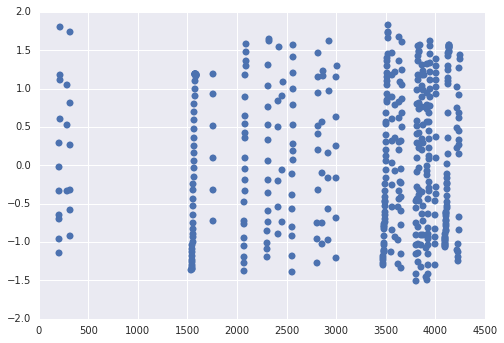

In [806]:
plt.plot(df_data_done_m['z_Amount_cumul'], 'o')
plt.show()
plt.close(1)


In [729]:
from scipy import stats, integrate
import seaborn as sns

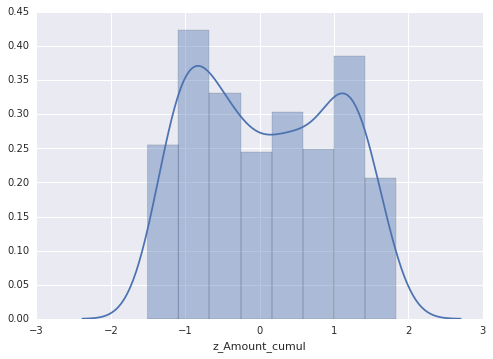

In [804]:
sns.distplot(df_data_done_m['z_Amount_cumul']);


plt.show()
plt.close(1)

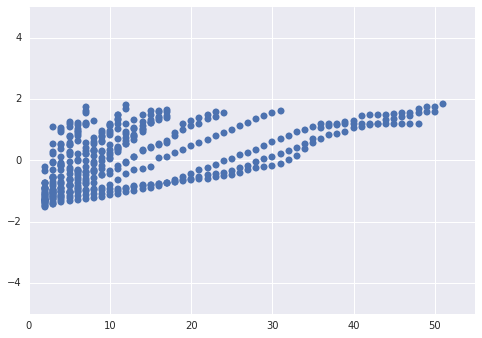

In [807]:
plt.plot( df_data_done_m['count'],df_data_done_m['z_Amount_cumul'], 'o')
    ## Set axis limits
plt.xlim(0, 55)
plt.ylim(-5, 5)
plt.show()
plt.close(1) 

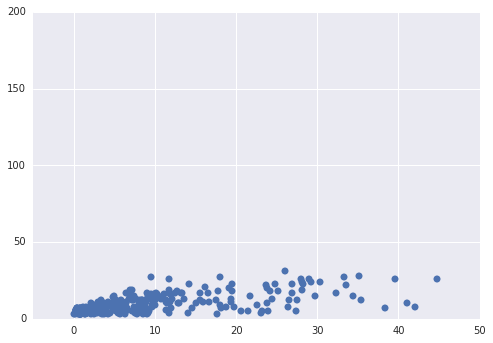

In [823]:
#if ther is any impact on patirent number

plt.plot(df_data_done_m.groupby(['Combined'])['Amount_cumul'].std(), df_data_done_m.groupby(['Combined'])['count_max'].mean(),'o', 1, 50)
    ## Set axis limits
plt.xlim(-5, 50)
plt.ylim(0, 200)
plt.show()
plt.close(1) 

In [562]:
def quarter_def(x):
    if x <= 0.25:
        return 1
    elif x <=0.5:
        return 2
    elif x <=0.75:
        return 3
    else:
        return 4
   # df.iloc[0].name

In [535]:
df_data_done['count_max'] = df_data_done.groupby(['Combined'])['count'].transform(max)




In [549]:
data_index = range(1,len(df_data_done)+1)
df_data_done.reindex(data_index)

,Study,Country,Number of Centers,Patient Target,Number of Visits,FPI/FSI,LPI/LSI,FPI/FSI Date,LPI/LSI Date,Year_Period,...,Measure,Amount,Combined,Period,count,per,per_period,z,count_max,Q1
1,DFI12860,Czech Republic CSU,2,10,14,2014-03-26,2014-12-15,41724,41988,2014,...,Monthly Inclusion,1,DFI12860Czech Republic CSU,2014-03-01,1,0.100000,0,-0.540062,8,1
2,DFI12860,Czech Republic CSU,2,10,14,2014-03-26,2014-12-15,41724,41988,2014,...,Monthly Inclusion,1,DFI12860Czech Republic CSU,2014-04-01,2,0.100000,0,-0.540062,8,1
3,DFI12860,Czech Republic CSU,2,10,14,2014-03-26,2014-12-15,41724,41988,2014,...,Monthly Inclusion,1,DFI12860Czech Republic CSU,2014-05-01,3,0.100000,0,-0.540062,8,1
4,DFI12860,Czech Republic CSU,2,10,14,2014-03-26,2014-12-15,41724,41988,2014,...,Monthly Inclusion,1,DFI12860Czech Republic CSU,2014-06-01,4,0.100000,0,-0.540062,8,0
5,DFI12860,Czech Republic CSU,2,10,14,2014-03-26,2014-12-15,41724,41988,2014,...,Monthly Inclusion,2,DFI12860Czech Republic CSU,2014-09-01,5,0.200000,0,1.620185,8,0
6,DFI12860,Czech Republic CSU,2,10,14,2014-03-26,2014-12-15,41724,41988,2014,...,Monthly Inclusion,2,DFI12860Czech Republic CSU,2014-10-01,6,0.200000,0,1.620185,8,0
7,DFI12860,Czech Republic CSU,2,10,14,2014-03-26,2014-12-15,41724,41988,2014,...,Monthly Inclusion,1,DFI12860Czech Republic CSU,2014-11-01,7,0.100000,0,-0.540062,8,0
8,DFI12860,Czech Republic CSU,2,10,14,2014-03-26,2014-12-15,41724,41988,2014,...,Monthly Inclusion,1,DFI12860Czech Republic CSU,2014-12-01,8,0.100000,0,-0.540062,8,0
9,DFI12860,France CSU,2,2,14,2014-09-29,2014-12-15,41911,41988,2014,...,Monthly Inclusion,1,DFI12860France CSU,2014-09-01,1,0.500000,0,NaN,2,1
10,DFI12860,France CSU,2,2,14,2014-09-29,2014-12-15,41911,41988,2014,...,Monthly Inclusion,1,DFI12860France CSU,2014-11-01,2,0.500000,0,NaN,2,1


In [688]:
df_data_done.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4246 entries, 0 to 4245
Data columns (total 23 columns):
Study                4246 non-null object
Country              4246 non-null object
Number of Centers    4244 non-null float64
Patient Target       4244 non-null float64
Number of Visits     4245 non-null float64
FPI/FSI              4246 non-null object
LPI/LSI              4246 non-null object
FPI/FSI Date         4246 non-null int64
LPI/LSI Date         4246 non-null int64
Year_Period          4246 non-null object
Month                4246 non-null object
Measure              4246 non-null object
Amount               4246 non-null float64
Combined             4246 non-null object
Period               4246 non-null datetime64[ns]
count                4246 non-null int64
per                  4246 non-null float64
per_period           4246 non-null int64
z                    4139 non-null float64
count_max            4246 non-null int64
Q1                   4246 non-null int64
Q1_

In [828]:
df_data_done['Q1_t'] =  df_data_done['count'] / df_data_done['count_max']
df_data_done['Period_Perc'] =  df_data_done['count'] / df_data_done['count_max']
#df_data_done['Q1'] =  df_data_done['Q1_t'].apply(lambda x: 1 if x <= 0.25 else 0)
df_data_done['Q1'] =  df_data_done['Q1_t'].apply(quarter_def)
df_data_done['const'] =  1

df_data_done['Period_Perc_up'] =  df_data_done['Period_Perc'].round(decimals=1)


In [829]:
df_data_done.head()

,Study,Country,Number of Centers,Patient Target,Number of Visits,FPI/FSI,LPI/LSI,FPI/FSI Date,LPI/LSI Date,Year_Period,...,per_period,z,count_max,Q1,Q1_t,const,Amount_cumul,z_Amount_cumul,Period_Perc,Period_Perc_up
0,DFI12860,Belgium,1,1,14,2014-04-10,2014-12-15,41739,41988,2014,...,1,NaN,1,4,1.000,1,1,NaN,1.000,1.0
1,DFI12860,Czech Republic CSU,2,10,14,2014-03-26,2014-12-15,41724,41988,2014,...,0,-0.540062,8,1,0.125,1,1,-1.295155,0.125,0.1
2,DFI12860,Czech Republic CSU,2,10,14,2014-03-26,2014-12-15,41724,41988,2014,...,0,-0.540062,8,1,0.250,1,2,-0.999119,0.250,0.2
3,DFI12860,Czech Republic CSU,2,10,14,2014-03-26,2014-12-15,41724,41988,2014,...,0,-0.540062,8,2,0.375,1,3,-0.703084,0.375,0.4
4,DFI12860,Czech Republic CSU,2,10,14,2014-03-26,2014-12-15,41724,41988,2014,...,0,-0.540062,8,2,0.500,1,4,-0.407049,0.500,0.5


In [ ]:
def dec_def(x):
    if x <= 0.1:
        return 1
    elif x <=0.2:
        return 2
    elif x <=0.75:
        return 3
    else:
        return 4

In [ ]:
    "def my_classifier(row):\n",
    "    if (row['petal length (cm)'] >= 5) & (row['petal width (cm)'] > 1.75):\n",
    "        return 2\n",
    "    if (row['petal length (cm)'] >= 5) & (row['petal width (cm)'] <= 1.75):\n",
    "        return 1\n",
    "    elif row['petal length (cm)'] < 2:\n",
    "        return 0\n",
    "    else:\n",
    "        return 1\n",
    "\n",
    "predictions = irisdf.apply(my_classifier, axis=1)\n"

In [487]:
df_data_done.sort_values(['Combined', 'Period'], inplace=True)

In [564]:
df_data_done.head()

,Study,Country,Number of Centers,Patient Target,Number of Visits,FPI/FSI,LPI/LSI,FPI/FSI Date,LPI/LSI Date,Year_Period,...,Amount,Combined,Period,count,per,per_period,z,count_max,Q1,Q1_t
0,DFI12860,Belgium,1,1,14,2014-04-10,2014-12-15,41739,41988,2014,...,1,DFI12860Belgium,2014-04-01,1,1.0,1,NaN,1,4,1.000
1,DFI12860,Czech Republic CSU,2,10,14,2014-03-26,2014-12-15,41724,41988,2014,...,1,DFI12860Czech Republic CSU,2014-03-01,1,0.1,0,-0.540062,8,1,0.125
2,DFI12860,Czech Republic CSU,2,10,14,2014-03-26,2014-12-15,41724,41988,2014,...,1,DFI12860Czech Republic CSU,2014-04-01,2,0.1,0,-0.540062,8,1,0.250
3,DFI12860,Czech Republic CSU,2,10,14,2014-03-26,2014-12-15,41724,41988,2014,...,1,DFI12860Czech Republic CSU,2014-05-01,3,0.1,0,-0.540062,8,2,0.375
4,DFI12860,Czech Republic CSU,2,10,14,2014-03-26,2014-12-15,41724,41988,2014,...,1,DFI12860Czech Republic CSU,2014-06-01,4,0.1,0,-0.540062,8,2,0.500


In [830]:
#f = {'Q1':['mean'], 'Amo':['prod']}
df_data_done_groupped_dec = df_data_done.groupby(['Combined',  'Period_Perc_up'], as_index = False)['Combined', 'Amount', 'const', 'per'].sum()
#df_data_done_groupped['Combined'] = df_data_done_groupped.index
df_data_done_groupped_dec.head()

,Combined,Period_Perc_up,Amount,const,per
0,DFI12860Belgium,1.0,1,1,1.0
1,DFI12860Czech Republic CSU,0.1,1,1,0.1
2,DFI12860Czech Republic CSU,0.2,1,1,0.1
3,DFI12860Czech Republic CSU,0.4,1,1,0.1
4,DFI12860Czech Republic CSU,0.5,1,1,0.1


In [858]:
df_data_done_groupped_dec['Amount_cumul'] =  df_data_done_groupped_dec.groupby(['Combined'])['Amount'].cumsum()

##aplly count!
df_data_done_groupped_dec['count'] = df_data_done_groupped_dec.groupby('Combined').cumcount() + 1
df_data_done_groupped_dec['count_max'] = df_data_done_groupped_dec.groupby(['Combined'])['count'].transform(max)
#df_data_done['Amount_log'] = df_data_done['Amount'].apply(np.log)
#df_data_done['Amount_cumul_log'] = df_data_done['Amount_cumul'].apply(np.log)

df_data_done_groupped_dec['per_cumul'] =  df_data_done.groupby(['Combined'])['per'].cumsum()
#df_data_done['per_cumul'] =  df_data_done.groupby(['Combined'])['Amount'].transform(percentage)

df_data_done_groupped_dec['z'] =  df_data_done_groupped_dec.groupby(['Combined'])['Amount'].transform(zscore)
df_data_done_groupped_dec['z_Amount_cumul'] =  df_data_done_groupped_dec.groupby(['Combined'])['Amount_cumul'].transform(zscore)

In [859]:
df_data_done_groupped_dec.head()

,Combined,Period_Perc_up,Amount,const,per,Amount_cumul,z,z_Amount_cumul,count,count_max,per_cumul
0,DFI12860Belgium,1.0,1,1,1.0,1,NaN,NaN,1,1,1.0
1,DFI12860Czech Republic CSU,0.1,1,1,0.1,1,-0.540062,-1.295155,1,8,0.1
2,DFI12860Czech Republic CSU,0.2,1,1,0.1,2,-0.540062,-0.999119,2,8,0.2
3,DFI12860Czech Republic CSU,0.4,1,1,0.1,3,-0.540062,-0.703084,3,8,0.3
4,DFI12860Czech Republic CSU,0.5,1,1,0.1,4,-0.540062,-0.407049,4,8,0.4


In [884]:
df_data_done_groupped_dec_m = df_data_done_groupped_dec.where((df_data_done_groupped_dec['count_max']==11)).dropna() 
df_data_done_groupped_dec_m.head()

,Combined,Period_Perc_up,Amount,const,per,Amount_cumul,z,z_Amount_cumul,count,count_max,per_cumul
311,EFC11570Argentina,0.0,4,1,0.006768,4,-1.922254,-1.361487,1,11,0.258065
312,EFC11570Argentina,0.1,21,3,0.035533,25,-1.265103,-1.261740,2,11,0.483871
313,EFC11570Argentina,0.2,51,3,0.086294,76,-0.105425,-1.019496,3,11,1.000000
314,EFC11570Argentina,0.3,66,3,0.111675,142,0.474414,-0.706004,4,11,0.018519
315,EFC11570Argentina,0.4,81,3,0.137056,223,1.054253,-0.321264,5,11,0.046296


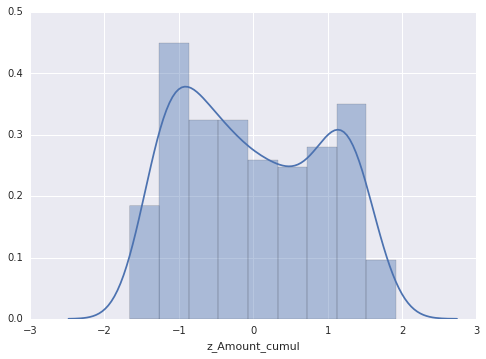

In [885]:
sns.distplot(df_data_done_groupped_dec_m['z_Amount_cumul']);


plt.show()
plt.close(1)

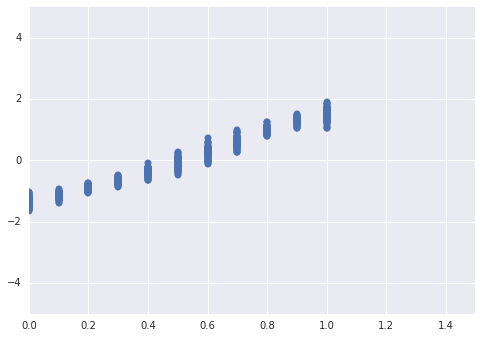

In [886]:
plt.plot( df_data_done_groupped_dec_m['Period_Perc_up'],df_data_done_groupped_dec_m['z_Amount_cumul'], 'o')
    ## Set axis limits
plt.xlim(0, 1.5)
plt.ylim(-5, 5)
plt.show()
plt.close(1) 

In [934]:
#func = lambda x: x * np.cos(x)
import math

func = lambda x: 1 / (1 + math.exp(-x))
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [936]:
N, n = 1000, 10
domain = np.linspace(0, 1, N)
x_sample = df_data_done_groupped_dec_m['Period_Perc_up']
y_sample = x_sample.apply(sigmoid)
#print domain

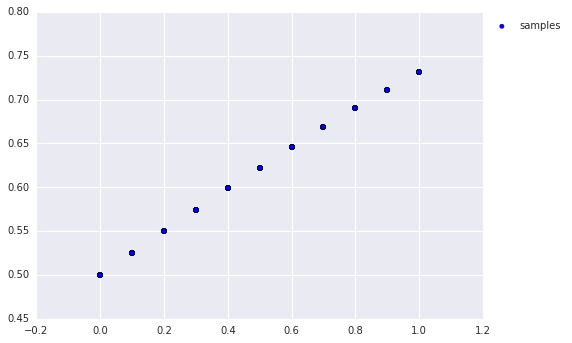

In [939]:
#f = plt.plot(domain, y_sample, label="ground truth")
f = plt.scatter(x_sample, y_sample, label="samples")
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))


plt.show()
plt.close(1)

In [940]:
X = np.array([x_sample]).T
model = LinearRegression().fit(X, y_sample)
print "R2 =", model.score(X, y_sample)
f = plt.plot(domain, func(domain), label="ground truth")
f = plt.scatter(x_sample, func(x_sample), label="samples")
f = plt.plot([0, 1], [model.intercept_, model.intercept_ + 10 * model.coef_[0]], label="linear regression")
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()
plt.close(1)

R2 = 0.998863811463


TypeError: only length-1 arrays can be converted to Python scalars

For degree 2 , R2 = 1.0


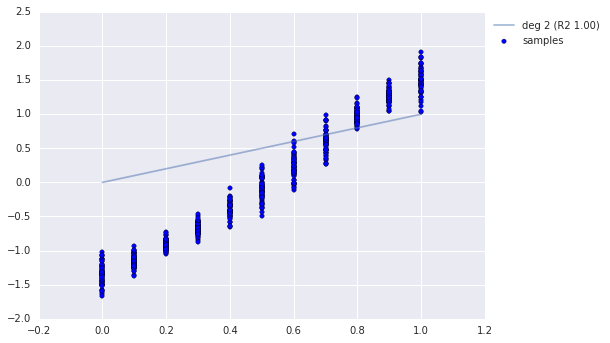

For degree 3 , R2 = 1.0


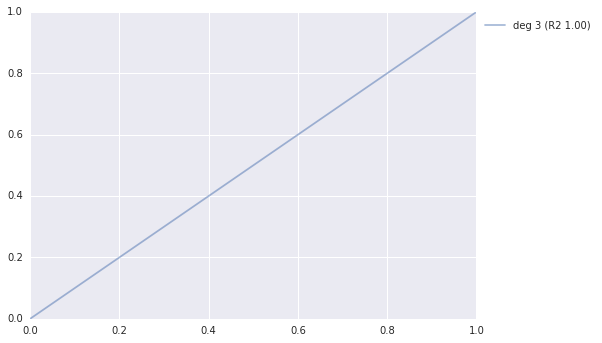

For degree 4 , R2 = 1.0


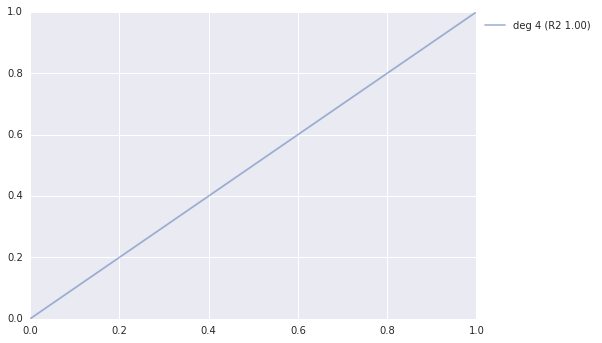

For degree 5 , R2 = 1.0


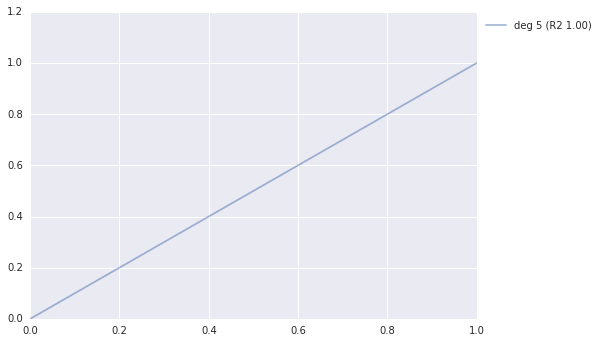

In [925]:
x_sample = df_data_done_groupped_dec_m['Period_Perc_up']
y_sample = df_data_done_groupped_dec_m['z_Amount_cumul']
f = plt.scatter(x_sample, y_sample, label="samples")
for degree in [ 2, 3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    # Compute a few R2 scores and print average performance
    scores = []
    for k in xrange(15):
        X_train, X_test, y_train, y_test = train_test_split(X, y_sample, train_size=.7)
        scores.append(model.fit(X_train, y_train).score(X_test, y_test))
    print "For degree", degree, ", R2 =", np.mean(scores)
    # Take last model to plot predictions
    y_pred = model.predict(np.array([domain]).T)
    plt.plot(domain, y_pred, alpha=.5, label="deg %d (R2 %.2f)" % (degree, model.score(X_test, y_test)))

    f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    
    plt.show()
plt.close(1)

In [864]:
df_data_done_groupped_dec.head()

,Combined,Period_Perc_up,Amount,const,per,Amount_cumul,z,z_Amount_cumul,count,count_max,per_cumul
0,DFI12860Belgium,1.0,1,1,1.0,1,NaN,NaN,1,1,1.0
1,DFI12860Czech Republic CSU,0.1,1,1,0.1,1,-0.540062,-1.295155,1,8,0.1
2,DFI12860Czech Republic CSU,0.2,1,1,0.1,2,-0.540062,-0.999119,2,8,0.2
3,DFI12860Czech Republic CSU,0.4,1,1,0.1,3,-0.540062,-0.703084,3,8,0.3
4,DFI12860Czech Republic CSU,0.5,1,1,0.1,4,-0.540062,-0.407049,4,8,0.4


In [581]:
#f = {'Q1':['mean'], 'Amo':['prod']}
df_data_done_groupped = df_data_done.groupby(['Combined',  'Q1'], as_index = False)['Combined', 'Amount', 'const', 'per'].sum()
#df_data_done_groupped['Combined'] = df_data_done_groupped.index
df_data_done_groupped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1475 entries, 0 to 1474
Data columns (total 5 columns):
Combined    1475 non-null object
Q1          1475 non-null int64
Amount      1475 non-null float64
const       1475 non-null int64
per         1475 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 69.1+ KB


In [ ]:
plt.plot( df_data_done_m['count'],df_data_done_m['z_Amount_cumul'], 'o')
    ## Set axis limits
plt.xlim(0, 55)
plt.ylim(-5, 5)
plt.show()
plt.close(1) 

In [583]:
df_data_done_groupped.sort_index()
df_data_done_groupped.head()

,Combined,Q1,Amount,const,per
0,DFI12860Belgium,4,1,1,1.0
1,DFI12860Czech Republic CSU,1,2,2,0.2
2,DFI12860Czech Republic CSU,2,2,2,0.2
3,DFI12860Czech Republic CSU,3,4,2,0.4
4,DFI12860Czech Republic CSU,4,2,2,0.2


In [593]:
df_data_done_groupped['Amount_Q1'] = df_data_done_groupped.apply(lambda x: x['Amount'] if x['Q1'] == 1 else 0, axis=1)
df_data_done_groupped['Amount_Q2'] = df_data_done_groupped.apply(lambda x: x['Amount'] if x['Q1'] == 2 else 0, axis=1)
df_data_done_groupped['Amount_Q3'] = df_data_done_groupped.apply(lambda x: x['Amount'] if x['Q1'] == 3 else 0, axis=1)
df_data_done_groupped['Amount_Q4'] = df_data_done_groupped.apply(lambda x: x['Amount'] if x['Q1'] == 4 else 0, axis=1)
#per
df_data_done_groupped['Per_Q1'] = df_data_done_groupped.apply(lambda x: x['per'] if x['Q1'] == 1 else 0, axis=1)
df_data_done_groupped['Per_Q2'] = df_data_done_groupped.apply(lambda x: x['per'] if x['Q1'] == 2 else 0, axis=1)
df_data_done_groupped['Per_Q3'] = df_data_done_groupped.apply(lambda x: x['per'] if x['Q1'] == 3 else 0, axis=1)
df_data_done_groupped['Per_Q4'] = df_data_done_groupped.apply(lambda x: x['per'] if x['Q1'] == 4 else 0, axis=1)
#month_num
df_data_done_groupped['M_Q1'] = df_data_done_groupped.apply(lambda x: x['const'] if x['Q1'] == 1 else 0, axis=1)
df_data_done_groupped['M_Q2'] = df_data_done_groupped.apply(lambda x: x['const'] if x['Q1'] == 2 else 0, axis=1)
df_data_done_groupped['M_Q3'] = df_data_done_groupped.apply(lambda x: x['const'] if x['Q1'] == 3 else 0, axis=1)
df_data_done_groupped['M_Q4'] = df_data_done_groupped.apply(lambda x: x['const'] if x['Q1'] == 4 else 0, axis=1)


In [594]:
df_data_done_groupped.head()

,Combined,Q1,Amount,const,per,Amount_Q1,Amount_Q2,Amount_Q3,Amount_Q4,Per_Q1,Per_Q2,Per_Q3,Per_Q4,M_Q1,M_Q2,M_Q3,M_Q4
0,DFI12860Belgium,4,1,1,1.0,0,0,0,1,0.0,0.0,0.0,1.0,0,0,0,1
1,DFI12860Czech Republic CSU,1,2,2,0.2,2,0,0,0,0.2,0.0,0.0,0.0,2,0,0,0
2,DFI12860Czech Republic CSU,2,2,2,0.2,0,2,0,0,0.0,0.2,0.0,0.0,0,2,0,0
3,DFI12860Czech Republic CSU,3,4,2,0.4,0,0,4,0,0.0,0.0,0.4,0.0,0,0,2,0
4,DFI12860Czech Republic CSU,4,2,2,0.2,0,0,0,2,0.0,0.0,0.0,0.2,0,0,0,2


In [681]:
df_data_done_groupped = df_data_done_groupped.groupby('Combined', as_index = False)['Amount_Q1','Amount_Q2','Amount_Q3','Amount_Q4', 'Per_Q1','Per_Q2','Per_Q3','Per_Q4','M_Q1','M_Q2','M_Q3','M_Q4'].sum()
df_data_done_groupped.head()

,Combined,Amount_Q1,Amount_Q2,Amount_Q3,Amount_Q4,Per_Q1,Per_Q2,Per_Q3,Per_Q4,M_Q1,M_Q2,M_Q3,M_Q4
0,DFI12860Belgium,0,0,0,1,0.000000,0.00,0.00,1.000000,0,0,0,1
1,DFI12860Czech Republic CSU,2,2,4,2,0.200000,0.20,0.40,0.200000,2,2,2,2
2,DFI12860France CSU,0,1,0,1,0.000000,0.50,0.00,0.500000,0,1,0,1
3,DFI12860Germany CSU,2,3,3,4,0.166667,0.25,0.25,0.333333,2,3,3,3
4,DFI12860Hungary,0,1,0,1,0.000000,0.50,0.00,0.500000,0,1,0,1


In [670]:
y =  df_data_done_comp.iloc[1,1:5].values.tolist()

y.insert(0,0)
#np.insert(y, 1, 1)
#yy = [0]
#yy.append(y)
#print y
#mp.iloc[1,1:5].T)
yy = pd.DataFrame(np.array(y))
print yy[0]


0    0
1    2
2    2
3    4
4    2
Name: 0, dtype: float64


[ 0.    0.25  0.5   0.75  1.  ]
[  0.   2.   4.   8.  10.]
[  0.08571429   0.94109347   2.51604938   4.51428571   6.63950617
   8.59541446  10.08571429]


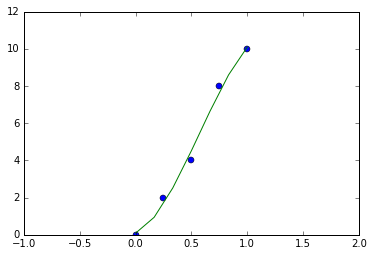

In [687]:
#### import numpy as np
import matplotlib.pyplot as plt

points = np.array([(0, 0), (0.25, 2), (0.5, 4), (0.75, 8), (1,10)])
#points = np.array([(0, 0), (12, 39), (25, 91), (38, 197), (51,284)])
# get x and y vectors
xx = [0, 0.25, 0.5, 0.75, 1]
xx = pd.DataFrame(np.array(xx))

x = points[:,0]
print x
y =points[:,1]
print y
#y = [0, 2.0, 2.0, 4.0, 2.0]
#y = df_data_done_comp.iloc[1,1:5].T
# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 7)
y_new = f(x_new)
print y_new
plt.plot(x,y,'o', x_new, y_new)
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()
plt.close(1)

In [647]:
print y

<built-in method tolist of numpy.ndarray object at 0x7f38b30ca670>


In [451]:
#df_Study_done.info()
df_Study_done['P25'] = df_data_done.groupby(['Combined'])['count'].count()/4

#add count
#add count 4


/usr/local/src/bluemix_jupyter_bundle.v81/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [453]:
df_Study_done.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1315 entries, 0 to 1807
Data columns (total 12 columns):
Unnamed: 0           1315 non-null int64
Study                1315 non-null object
Country              1315 non-null object
Number of Centers    1214 non-null float64
Patient Target       1215 non-null float64
Number of Visits     1201 non-null float64
FPI/FSI              1315 non-null object
LPI/LSI              1315 non-null object
FPI/FSI Date         1315 non-null int64
LPI/LSI Date         1315 non-null int64
Combined             1315 non-null object
P25                  0 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 133.6+ KB


In [456]:
df_att_done = df_data_done.set_index('Combined')

In [463]:
df_att_done.groupby(by='Combined').

NameError: name 'index' is not defined

In [448]:
print df_data_done.head()

         Study  Country  Number of Centers  Patient Target  Number of Visits  \
3556  LTS12869  USA CSU                  2              12                40   
3557  LTS12869  USA CSU                  2              12                40   
3650  MSC12870  USA CSU                  7              19                23   
3558  LTS12869  USA CSU                  2              12                40   
3651  MSC12870  USA CSU                  7              19                23   

         FPI/FSI     LPI/LSI  FPI/FSI Date  LPI/LSI Date Year_Period Month  \
3556  2008-09-10  2014-02-07         39701         41677        2008    09   
3557  2008-09-10  2014-02-07         39701         41677        2009    09   
3650  2010-05-18  2013-07-15         40316         41470        2010    05   
3558  2008-09-10  2014-02-07         39701         41677        2010    06   
3651  2010-05-18  2013-07-15         40316         41470        2010    06   

                Measure  Amount         Combined  

In [441]:
import numpy as np

df_data_done_pivot = pd.pivot_table(df_data_done[(df_data_done['per']<=1)], values=['Amount', 'z', 'per'], index=['count'], columns=['Combined'], aggfunc=np.sum)

In [442]:
df_data_done_pivot.columns.unique()
print df_data_done.head()
#s_mi.iloc[s_mi.index.isin(['a', 'c', 'e'], level=1)]

         Study  Country  Number of Centers  Patient Target  Number of Visits  \
3556  LTS12869  USA CSU                  2              12                40   
3557  LTS12869  USA CSU                  2              12                40   
3650  MSC12870  USA CSU                  7              19                23   
3558  LTS12869  USA CSU                  2              12                40   
3651  MSC12870  USA CSU                  7              19                23   

         FPI/FSI     LPI/LSI  FPI/FSI Date  LPI/LSI Date Year_Period Month  \
3556  2008-09-10  2014-02-07         39701         41677        2008    09   
3557  2008-09-10  2014-02-07         39701         41677        2009    09   
3650  2010-05-18  2013-07-15         40316         41470        2010    05   
3558  2008-09-10  2014-02-07         39701         41677        2010    06   
3651  2010-05-18  2013-07-15         40316         41470        2010    06   

                Measure  Amount         Combined  

In [443]:
#fig = plt.figure(figsize=(4,3))
#ax = fig.add_subplot(111)
#ax.plot(df_data_done_pivot['per'])
#fig.savefig('fig1.png', dpi = 300)
#fig.show()
#fig.close()
#df_data_done_pivot.columns = df_data_done_pivot.columns.droplevel(0)
x = df_data_done_pivot.index
#print df_data_done_pivot.index
# calculate new x's and y's
x_new = np.linspace(0, 51, 1)
#y_new = f(x_new)

#plt.plot( df_data_done_pivot['per'], '-')
#plt.xlim([x[0]-1, x[-1] + 1 ])
#plt.show()

#plt.plot(df_data_done_pivot['per'])
#plt.figure(figsize=(3,4))
X_25 = df_data_done_pivot[('per', 'MSC12870USA CSU')].count()/4
X_50 = df_data_done_pivot[('per', 'MSC12870USA CSU')].count()/2
X_75 = df_data_done_pivot[('per', 'MSC12870USA CSU')].count()*3/4

# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2,2, figsize=(10,6))
#axarr[0].plot(x, y)
#axarr[0].set_title('Sharing X axis')
#axarr[1].scatter(x, y)

#plt.plot( X_25, [0,1], 'r-', label='line 1', linewidth=2)
axarr[0,0].set_title('Amount in Percentage, cumul')
#axarr[0,0].axvline(x=X_25)
#axarr[0,0].axvline(x=X_50)
#axarr[0,0].axvline(x=X_75)
#.loc[:, 'foo':'sat']
axarr[0,0].plot(df_data_done.where(df_data_done['Combined'].str.contains('MSC12870')).cumsum(), 'go-', label='line 1', linewidth=2)
#
#axarr[0,0].plot( df_data_done_pivot.loc[:, ('per', 'MSC12870USA CSU')].cumsum(), 'go-', label='line 1', linewidth=2)
#axarr[0,0].plot( df_data_done_pivot.loc[:, [2,4,5]].cumsum(), '-', label='line 1', linewidth=2)
#axarr[1,0].set_title('Amount in Percentage')
#axarr[1,0].plot( df_data_done_pivot[('per', 'MSC12870USA CSU')], 'go-', label='line 1', linewidth=2)

#plot([1,2,3], [1,4,9], 'rs',  label='line 2')
axarr[0,0].axis([0,50 + 1, 0, 1.1])
axarr[1,0].axis([0,df_data_done_pivot[('per', 'MSC12870USA CSU')].count() + 1, 0, 0.5])
#plt.legend()
plt.show()
plt.close(1) 


TypeError: unsupported operand type(s) for +: 'Timestamp' and 'float'

In [ ]:
print df_data_done_pivot.head()

In [ ]:
print df_data_done['z'].tail()

In [ ]:
period_inc('DFI12860', 'Italy CSU', df_data_done)

In [ ]:
print df_data_done['period_index']

In [ ]:
df_data_group = df_data_done.groupby(['Study', 'Country'])['Amount'].count()
#data.groupby(['col1', 'col2'])['col3'].mean()
print df_data_group